<a href="https://colab.research.google.com/github/Us9r/laskar-ai-capstone/blob/main/classification/studentFinalScore_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **💼 Executive Summary 👔**

---

**Proyek Klasifikasi Skor Akhir Siswa🏫**

Proyek ini bertujuan untuk membangun model prediktif yang mampu mengklasifikasikan skor akhir siswa (`BAIK` / `CUKUP`) berdasarkan berbagai atribut siswa dan **data akademis**. **Tujuan utama** adalah untuk **mengidentifikasi faktor-faktor kunci** yang memengaruhi **kinerja siswa** dan mengembangkan alat untuk memprediksi keberhasilan mereka.


**1. Kinerja Model Unggul Random Forest dan XGBoost**

Model `Random Forest` dan `XGBoost` menunjukkan **kinerja** prediktif **terbaik di antara model yang dieksplorasi.** Berdasarkan evaluasi pada set pengujian, `XGBoost` mencapai `Akurasi` sebesar `0.87` dan `AUC` sebesar `0.94`, sedangkan `Random Forest` mencapai `Akurasi` sebesar `0.86` dan `AUC` sebesar `0.95`. Nilai `AUC` yang tinggi (mendekati 1) menunjukkan **kemampuan model** yang sangat baik dalam **membedakan** antara siswa dengan skor akhir `BAIK` dan `CUKUP`.

**2. Dampak SMOTE Terbatas**

Teknik SMOTE yang diterapkan untuk **menangani ketidakseimbangan kelas** pada data pelatihan ternyata **tidak menghasilkan** peningkatan **kinerja** yang **signifikan** pada set pengujian berdasarkan metrik evaluasi yang diukur. Sebagai contoh, `Akurasi` `XGBoost` dengan SMOTE adalah `0.86` (dibandingkan `0.87` tanpa SMOTE) dan `AUC`-nya `0.94` (sama dengan tanpa SMOTE). Demikian pula, metrik untuk `Random Forest` dengan dan tanpa SMOTE juga sangat serupa. Hal ini mungkin mengindikasikan bahwa model Random Forest dan XGBoost sudah cukup kuat untuk menangani tingkat ketidakseimbangan yang ada, atau bahwa **data sintetis** yang dihasilkan SMOTE **tidak** secara **efektif** meningkatkan kemampuan generalisasi model pada data pengujian.

**3. 15 Fitur Teratas**
Analisis pentingnya fitur menggunakan model `XGBoost` **mengidentifikasi 15 fitur teratas yang paling berpengaruh** dalam menentukan skor akhir siswa. Fitur-fitur ini adalah penggerak utama dalam memprediksi apakah seorang siswa akan mencapai skor `BAIK` atau `CUKUP`. **Analisis SHAP** lebih lanjut memberikan **penjelasan** granular tentang **dampak spesifik** dari setiap fitur (misalnya, nilai mata pelajaran tertentu, absensi, status orang tua) terhadap **probabilitas siswa mendapatkan skor BAIK untuk setiap individu.**

**👩🏻‍💻 Kesimpulan dan Rekomendasi 👨🏻‍🎓**
---
---
Model `XGBoost` yang dilatih dengan 15 fitur teratas adalah kandidat yang kuat untuk implementasi prediktif, menawarkan keseimbangan antara kinerja yang tinggi (`Akurasi` `0.86`, `AUC` `0.94`) dan interpretasi yang lebih baik dengan fokus pada fitur-fitur paling relevan. Analisis feature importance dan SHAP yang mendetail memberikan wawasan berharga bagi pihak terkait (misalnya, pengajar, konselor, manajemen sekolah) untuk:

1.  **Mengidentifikasi siswa** yang berisiko mendapatkan skor CUKUP berdasarkan profil fitur mereka.
2.  **Merancang intervensi** yang ditargetkan berdasarkan fitur-fitur yang paling berpengaruh (misalnya, fokus pada perbaikan nilai mata pelajaran tertentu jika itu adalah fitur penting).
3.  **Memahami faktor-faktor positif** yang berkontribusi pada pencapaian skor BAIK.

**Implementasi model ini dapat mendukung pengambilan keputusan berbasis data untuk meningkatkan hasil belajar siswa.**

**Penambahan nilai-nilai spesifik untuk metrik evaluasi akan memberikan gambaran yang lebih konkret tentang kinerja model dan alasan di balik kesimpulan tentang SMOTE.**

˙✧˖°🎓 ༘⋆｡ ˚


---


# **1. Import**
importing library and dataset from github for easier read

In [1]:
import pandas as pd #import
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import joblib


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Us9r/laskar-ai-capstone/main/resource/dataset/datasmk2.csv') #read csv

In [3]:
df.head() #check load dataset

,gender,absences,n_agama,n_pkn,n_bindo,n_mat,n_bing,n_por,n_bjawa,n_kejuruan,...,father_edu,father_work,father_salary,mother_edu,mother_work,mother_salary,scholarship,family_size,house_status,final_score
0,P,1,94,84,87,85,82,89,89,87,...,SD sederajat,Buruh,Cukup Tinggi,SD sederajat,Tidak bekerja,Tidak Berpenghasilan,Tidak,7,Rumah Sendiri,BAIK
1,P,1,83,82,87,82,79,84,88,86,...,SMP sederajat,Karyawan Swasta,Cukup Rendah,SD sederajat,Pedagang Kecil,Cukup Rendah,Tidak,4,Sewa,CUKUP
2,P,0,94,83,87,90,84,87,87,88,...,SMA sederajat,Tidak bekerja,Tidak Berpenghasilan,SMA sederajat,Tidak bekerja,Tidak Berpenghasilan,Tidak,5,Menumpang,BAIK
3,P,3,94,83,88,85,81,89,89,88,...,SMP sederajat,Buruh,Cukup Tinggi,SD sederajat,Tidak bekerja,Tidak Berpenghasilan,Ya,4,Rumah Sendiri,BAIK
4,L,5,91,82,87,84,80,85,89,87,...,SMA sederajat,Buruh,Cukup Rendah,SD sederajat,Buruh,Cukup Rendah,Tidak,5,Sewa,BAIK


# **2. Preprocessing**

> - Encoding Target features (final_score) into binary value
> - Encoding all ohter categorical features using dummy encoding
> - Normalization numerical features with min-max scaling

### final Score
BAIK = 1 and CUKUP = 0

In [4]:
df['final_score'] = df['final_score'].apply(lambda x: 0 if x == 'CUKUP' else 1)

### Categorical features
using dummy encode "n(all feature) - 1" to df_encoded

In [5]:
columns_to_encode = ['gender', 'n_sikap', 'organization', 'extracurricular', 'origin_jhs', 'address', 'parent_status', 'father_edu', 'father_work', 'father_salary', 'mother_edu', 'mother_work', 'mother_salary', 'scholarship', 'house_status']
df_encoded = pd.get_dummies(df, columns=columns_to_encode, dummy_na=False, dtype=int)

In [6]:
df_encoded.head() #check encoding

,absences,n_agama,n_pkn,n_bindo,n_mat,n_bing,n_por,n_bjawa,n_kejuruan,family_size,...,mother_salary_Cukup Tinggi,mother_salary_Rendah,mother_salary_Sangat Rendah,mother_salary_Tidak Berpenghasilan,mother_salary_Tinggi,scholarship_Tidak,scholarship_Ya,house_status_Menumpang,house_status_Rumah Sendiri,house_status_Sewa
0,1,94,84,87,85,82,89,89,87,7,...,0,0,0,1,0,1,0,0,1,0
1,1,83,82,87,82,79,84,88,86,4,...,0,0,0,0,0,1,0,0,0,1
2,0,94,83,87,90,84,87,87,88,5,...,0,0,0,1,0,1,0,1,0,0
3,3,94,83,88,85,81,89,89,88,4,...,0,0,0,1,0,0,1,0,1,0
4,5,91,82,87,84,80,85,89,87,5,...,0,0,0,0,0,1,0,0,0,1


In [7]:
df_encoded.to_csv('df_encoded.csv', index=False)

### Normalization

In [8]:
features_to_normalize = ['absences', 'n_agama', 'n_pkn', 'n_bindo', 'n_mat', 'n_bing', 'n_por', 'n_bjawa', 'n_kejuruan', 'family_size']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to the selected features
df_normalized = df_encoded.copy()
df_normalized[features_to_normalize] = scaler.fit_transform(df_encoded[features_to_normalize])

df_normalized.head()

,absences,n_agama,n_pkn,n_bindo,n_mat,n_bing,n_por,n_bjawa,n_kejuruan,family_size,...,mother_salary_Cukup Tinggi,mother_salary_Rendah,mother_salary_Sangat Rendah,mother_salary_Tidak Berpenghasilan,mother_salary_Tinggi,scholarship_Tidak,scholarship_Ya,house_status_Menumpang,house_status_Rumah Sendiri,house_status_Sewa
0,0.142857,0.76,0.5625,0.555556,0.50,0.4375,0.777778,0.785714,0.615385,0.444444,...,0,0,0,1,0,1,0,0,1,0
1,0.142857,0.32,0.4375,0.555556,0.35,0.2500,0.500000,0.714286,0.538462,0.111111,...,0,0,0,0,0,1,0,0,0,1
2,0.000000,0.76,0.5000,0.555556,0.75,0.5625,0.666667,0.642857,0.692308,0.222222,...,0,0,0,1,0,1,0,1,0,0
3,0.428571,0.76,0.5000,0.611111,0.50,0.3750,0.777778,0.785714,0.692308,0.111111,...,0,0,0,1,0,0,1,0,1,0
4,0.714286,0.64,0.4375,0.555556,0.45,0.3125,0.555556,0.785714,0.615385,0.222222,...,0,0,0,0,0,1,0,0,0,1


In [9]:
df_normalized.info() #check preprocessing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 90 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   absences                            856 non-null    float64
 1   n_agama                             856 non-null    float64
 2   n_pkn                               856 non-null    float64
 3   n_bindo                             856 non-null    float64
 4   n_mat                               856 non-null    float64
 5   n_bing                              856 non-null    float64
 6   n_por                               856 non-null    float64
 7   n_bjawa                             856 non-null    float64
 8   n_kejuruan                          856 non-null    float64
 9   family_size                         856 non-null    float64
 10  final_score                         856 non-null    int64  
 11  gender_L                            856 non-n

# **3. Split train-test set**
80%  for training and 20% for prediction, there are imbalanced class in target feature, so we're using SMOTE

the train set is made into two
- X_train, y_train
- X_train_resampled, y_train_resampled

In [10]:
# Pisahkan fitur (X) dan target (y)
X = df_normalized.drop('final_score', axis=1)
y = df_normalized['final_score']

# split train-test set dengan pemisahan target merata (parameter stratify)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (684, 89)
Shape of X_test: (172, 89)
Shape of y_train: (684,)
Shape of y_test: (172,)


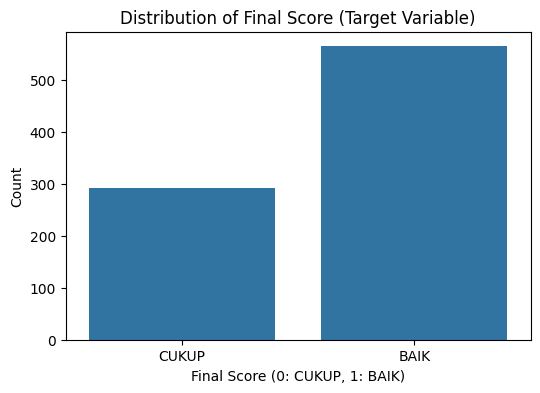

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='final_score', data=df_normalized)
plt.title('Distribution of Final Score (Target Variable)')
plt.xlabel('Final Score (0: CUKUP, 1: BAIK)')
plt.ylabel('Count')
plt.xticks([0, 1], ['CUKUP', 'BAIK'])
plt.show() #distribusi fitur target

### SMOTE

In [12]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Distribusi kelas sebelum SMOTE train-set
print("Original dataset shape %s" % Counter(y_train))
print("Resampled dataset shape %s" % Counter(y_train_resampled))

# Distribusi kelas setelah SMOTE pada train-set
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Original dataset shape Counter({1: 451, 0: 233})
Resampled dataset shape Counter({1: 451, 0: 451})
Shape of X_train_resampled: (902, 89)
Shape of y_train_resampled: (902,)
Shape of X_test: (172, 89)
Shape of y_test: (172,)


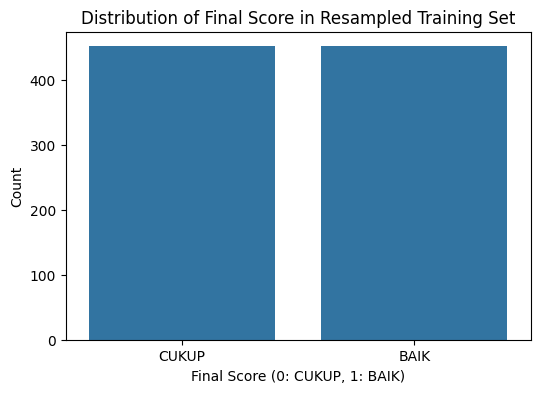

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled)
plt.title('Distribution of Final Score in Resampled Training Set')
plt.xlabel('Final Score (0: CUKUP, 1: BAIK)')
plt.ylabel('Count')
plt.xticks([0, 1], ['CUKUP', 'BAIK'])
plt.show()

# **4. Modeling**

### Inisialisasi

In [14]:
knn_model = KNeighborsClassifier()
svm_model = SVC(probability=True)  # probability=True is needed for plotting ROC curve later
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

### Training

In [15]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [17]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### Predict

In [19]:
knn_pred = knn_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# simpan nilai untuk visualisasi ROC Curve
knn_proba = knn_model.predict_proba(X_test)[:, 1]
svm_proba = svm_model.predict_proba(X_test)[:, 1]
rf_proba = rf_model.predict_proba(X_test)[:, 1]
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

# **4a. Modeling w/ SMOTE**

### Inisialisasi

In [20]:
knn_model_smote = KNeighborsClassifier()
svm_model_smote = SVC(probability=True, random_state=42)
rf_model_smote = RandomForestClassifier(random_state=42)
xgb_model_smote = XGBClassifier(random_state=42)

### Training

In [21]:
knn_model_smote.fit(X_train_resampled, y_train_resampled)
svm_model_smote.fit(X_train_resampled, y_train_resampled)
rf_model_smote.fit(X_train_resampled, y_train_resampled)
xgb_model_smote.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### Predict

In [22]:
# Predict on the test set
knn_pred_smote = knn_model_smote.predict(X_test)
svm_pred_smote = svm_model_smote.predict(X_test)
rf_pred_smote = rf_model_smote.predict(X_test)
xgb_pred_smote = xgb_model_smote.predict(X_test)

# Save probability values for ROC Curve visualization
knn_proba_smote = knn_model_smote.predict_proba(X_test)[:, 1]
svm_proba_smote = svm_model_smote.predict_proba(X_test)[:, 1]
rf_proba_smote = rf_model_smote.predict_proba(X_test)[:, 1]
xgb_proba_smote = xgb_model_smote.predict_proba(X_test)[:, 1]

# **5. Model Evaluation**
> - XGBoost memiliki akurasi keseluruhan yang sedikit lebih tinggi (acc = 0.87, auc = 0.94).

> - Random Forest memiliki kemampuan pembedaan antara kelas yang sedikit lebih baik (acc = 0.86, auc = 0,95).

> - Tidak ada perbedaan signifikan antara model yang dilatih dengan dataset asli dan hasil SMOTE

### ROC Curve

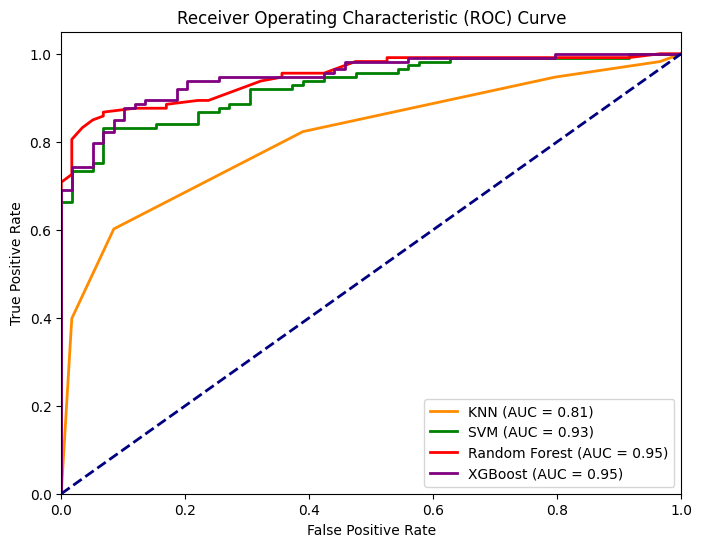

In [23]:
# Hitung nilai ROC
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_proba)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_proba)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='purple', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

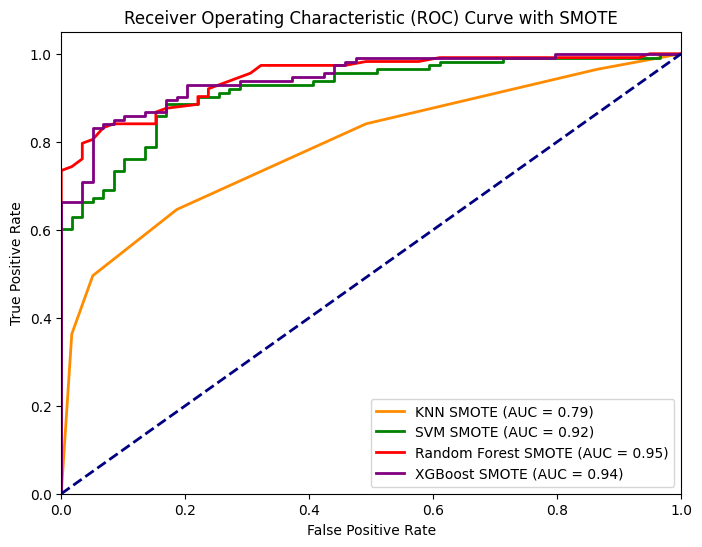

In [24]:
# Hitung nilai ROC model_SMOTE
fpr_knn_smote, tpr_knn_smote, _ = roc_curve(y_test, knn_proba_smote)
roc_auc_knn_smote = auc(fpr_knn_smote, tpr_knn_smote)

fpr_svm_smote, tpr_svm_smote, _ = roc_curve(y_test, svm_proba_smote)
roc_auc_svm_smote = auc(fpr_svm_smote, tpr_svm_smote)

fpr_rf_smote, tpr_rf_smote, _ = roc_curve(y_test, rf_proba_smote)
roc_auc_rf_smote = auc(fpr_rf_smote, tpr_rf_smote)

fpr_xgb_smote, tpr_xgb_smote, _ = roc_curve(y_test, xgb_proba_smote)
roc_auc_xgb_smote = auc(fpr_xgb_smote, tpr_xgb_smote)

# Plot kurva ROC model_SMOTE
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn_smote, tpr_knn_smote, color='darkorange', lw=2, label=f'KNN SMOTE (AUC = {roc_auc_knn_smote:.2f})')
plt.plot(fpr_svm_smote, tpr_svm_smote, color='green', lw=2, label=f'SVM SMOTE (AUC = {roc_auc_svm_smote:.2f})')
plt.plot(fpr_rf_smote, tpr_rf_smote, color='red', lw=2, label=f'Random Forest SMOTE (AUC = {roc_auc_rf_smote:.2f})')
plt.plot(fpr_xgb_smote, tpr_xgb_smote, color='purple', lw=2, label=f'XGBoost SMOTE (AUC = {roc_auc_xgb_smote:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with SMOTE')
plt.legend(loc="lower right")
plt.show()

### Accuracy

In [25]:
def evaluate_model(y_true, y_pred, model_name):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average='weighted')
  recall = recall_score(y_true, y_pred, average='weighted')
  f1 = f1_score(y_true, y_pred, average='weighted')

  print(f"Evaluation Metrics for {model_name}:")
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1-Score: {f1:.4f}")
  print("-" * 30)

# metrik evaluasi tiap model
evaluate_model(y_test, knn_pred, "K-Nearest Neighbors")
evaluate_model(y_test, svm_pred, "Support Vector Machine")
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, xgb_pred, "XGBoost")

Evaluation Metrics for K-Nearest Neighbors:
Accuracy: 0.7500
Precision: 0.7472
Recall: 0.7500
F1-Score: 0.7484
------------------------------
Evaluation Metrics for Support Vector Machine:
Accuracy: 0.8198
Precision: 0.8241
Recall: 0.8198
F1-Score: 0.8095
------------------------------
Evaluation Metrics for Random Forest:
Accuracy: 0.8488
Precision: 0.8478
Recall: 0.8488
F1-Score: 0.8482
------------------------------
Evaluation Metrics for XGBoost:
Accuracy: 0.8837
Precision: 0.8830
Recall: 0.8837
F1-Score: 0.8832
------------------------------


In [26]:
# Metrik Evaluasi tiap model_SMOTE
print("\n--- Evaluation Metrics for Models with SMOTE ---")
evaluate_model(y_test, knn_pred_smote, "K-Nearest Neighbors (SMOTE)")
evaluate_model(y_test, svm_pred_smote, "Support Vector Machine (SMOTE)")
evaluate_model(y_test, rf_pred_smote, "Random Forest (SMOTE)")
evaluate_model(y_test, xgb_pred_smote, "XGBoost (SMOTE)")



--- Evaluation Metrics for Models with SMOTE ---
Evaluation Metrics for K-Nearest Neighbors (SMOTE):
Accuracy: 0.7035
Precision: 0.7580
Recall: 0.7035
F1-Score: 0.7109
------------------------------
Evaluation Metrics for Support Vector Machine (SMOTE):
Accuracy: 0.8547
Precision: 0.8553
Recall: 0.8547
F1-Score: 0.8549
------------------------------
Evaluation Metrics for Random Forest (SMOTE):
Accuracy: 0.8605
Precision: 0.8635
Recall: 0.8605
F1-Score: 0.8615
------------------------------
Evaluation Metrics for XGBoost (SMOTE):
Accuracy: 0.8721
Precision: 0.8733
Recall: 0.8721
F1-Score: 0.8726
------------------------------


### Confussion Matrix

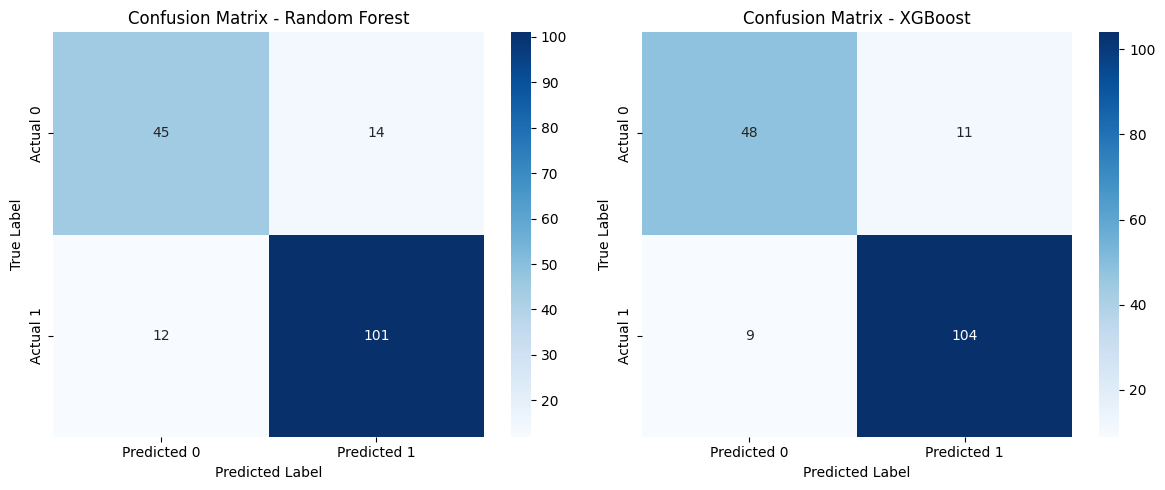

In [27]:
# hitung conffusion matrix
cm_rf = confusion_matrix(y_test, rf_pred)
cm_xgb = confusion_matrix(y_test, xgb_pred)

# visualisasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 2, 2)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

# **6. Top 15 Features Selection**
XGBoost model selected for further Modeling

In [28]:
feature_importances = xgb_model.feature_importances_

# Buat DataFrame untuk feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

In [29]:
# Urutkan fitur berdasarkan importance dalam urutan menurun
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [30]:
# Pilih 15 fitur teratas
top_15_features = feature_importance_df.head(15)

# Tampilkan 15 fitur teratas dan nilainya
print("Top 15 Features and their Importances (XGBoost):")
print(top_15_features)

Top 15 Features and their Importances (XGBoost):
                               Feature  Importance
12                           n_sikap_A    0.336946
8                           n_kejuruan    0.079240
67                 mother_work_Lainnya    0.059039
4                                n_mat    0.043488
6                                n_por    0.041939
1                              n_agama    0.036274
7                              n_bjawa    0.023148
81         mother_salary_Sangat Rendah    0.021821
52  father_salary_Tidak Berpenghasilan    0.020936
3                              n_bindo    0.020081
17               extracurricular_tidak    0.019064
34            father_edu_SMP sederajat    0.018652
36                   father_work_Buruh    0.018312
78          mother_salary_Cukup Rendah    0.018097
65                   mother_work_Buruh    0.017942


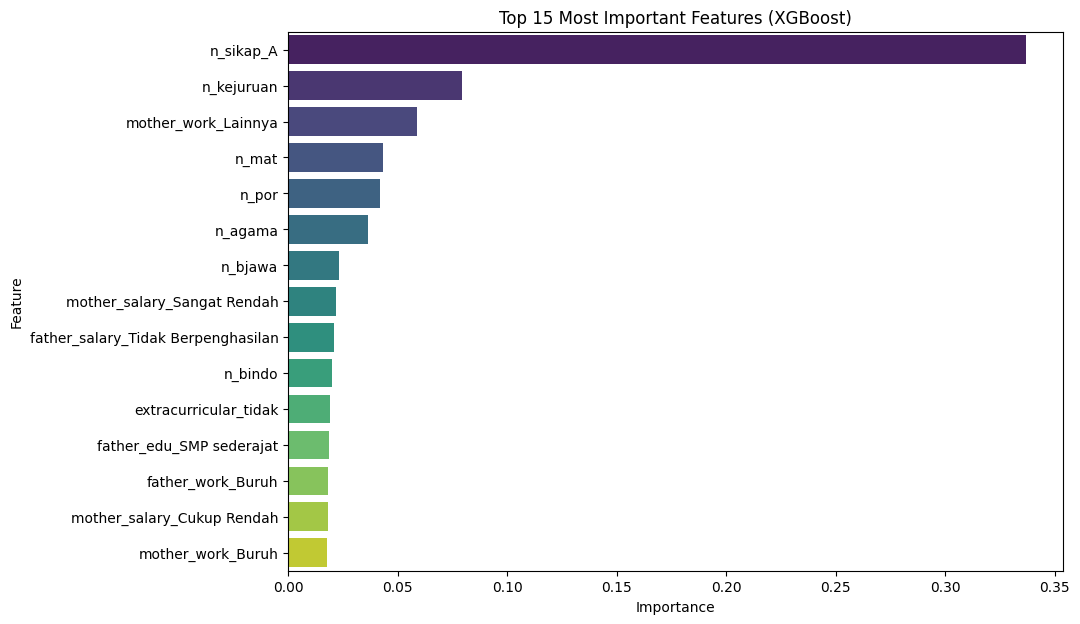

In [31]:
# Visualisasikan top 15 fitur
plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=top_15_features, hue='Feature', legend=False, palette='viridis')
plt.title('Top 15 Most Important Features (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Modeling w/ Top 15 features

#### Top 15 features selection

In [32]:
X_train_top15 = X_train_resampled[top_15_features['Feature']]
X_test_top15 = X_test[top_15_features['Feature']]

#### Inisialisasi dan train

In [33]:
# Create and train a new XGBoost model with the selected features
xgb_model_top15 = XGBClassifier(random_state=42)
xgb_model_top15.fit(X_train_top15, y_train_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

#### Predict

In [34]:
# Predict using the new model
xgb_pred_top15 = xgb_model_top15.predict(X_test_top15)
xgb_proba_top15 = xgb_model_top15.predict_proba(X_test_top15)[:, 1]

## Model Evaluation
akurasi sedikit lebih rendah dibanding model dengan semua fitur

In [35]:
# Evaluate the new model
print("\nEvaluation of XGBoost model with Top 15 Features:")
evaluate_model(y_test, xgb_pred_top15, "XGBoost (Top 15 Features)")


Evaluation of XGBoost model with Top 15 Features:
Evaluation Metrics for XGBoost (Top 15 Features):
Accuracy: 0.8488
Precision: 0.8488
Recall: 0.8488
F1-Score: 0.8488
------------------------------


#### ROC Curve

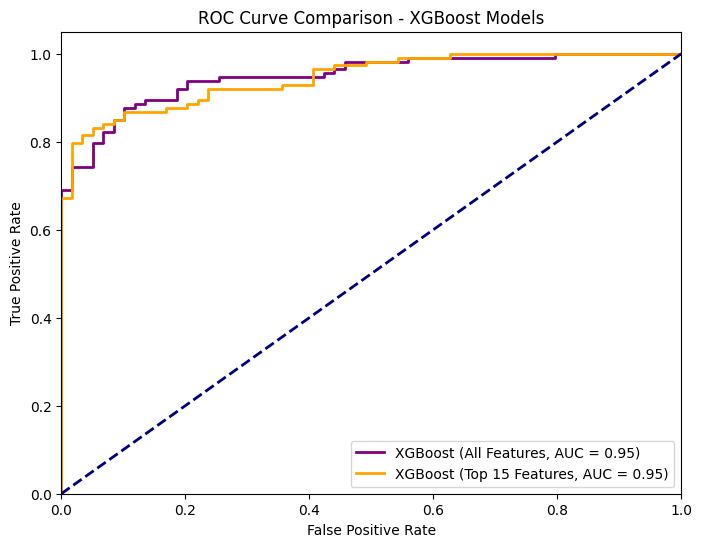

In [36]:
# Calculate ROC for the new model
fpr_xgb_top15, tpr_xgb_top15, _ = roc_curve(y_test, xgb_proba_top15)
roc_auc_xgb_top15 = auc(fpr_xgb_top15, tpr_xgb_top15)

# Plot ROC curves for comparison
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='purple', lw=2, label=f'XGBoost (All Features, AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_xgb_top15, tpr_xgb_top15, color='orange', lw=2, label=f'XGBoost (Top 15 Features, AUC = {roc_auc_xgb_top15:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - XGBoost Models')
plt.legend(loc="lower right")
plt.show()

#### Confussion Matrix

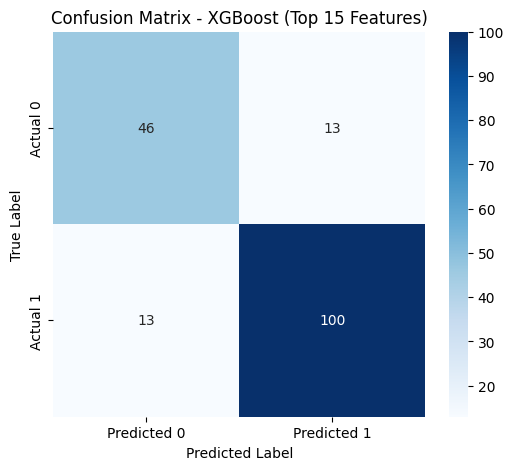

In [37]:
# Calculate confusion matrix for the new model
cm_xgb_top15 = confusion_matrix(y_test, xgb_pred_top15)

# Visualize confusion matrix for the new model
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb_top15, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - XGBoost (Top 15 Features)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# **7. Export the Result**

In [38]:
# Define the filename for the model
filename = 'xgb_clmodel.pkl'

# Save the model to the file
joblib.dump(xgb_model_top15, filename)
print(f"XGBoost model with Top 15 Features exported to {filename}")

XGBoost model with Top 15 Features exported to xgb_clmodel.pkl


In [39]:
# Create a DataFrame with the first 10 rows of X_test_top15 and add the actual y_test labels
test_data_export = X_test_top15.head(10).copy()
test_data_export['Actual_final_score'] = y_test.head(10).values

# Export the DataFrame to an Excel file
excel_filename = 'student_final_score_input.xlsx'
test_data_export.to_excel(excel_filename, index=False)

print(f"First 10 rows of test data with top 15 features, actual and predicted labels exported to {excel_filename}")

First 10 rows of test data with top 15 features, actual and predicted labels exported to student_final_score_input.xlsx


In [40]:
testing_df = X_test_top15.head(10)

# Export ke Excel tanpa menyertakan index (tanpa label baris)
testing_df.to_excel('student_final_score_input_user.xlsx', index=False)

print("10 baris pertama data testing top 15 features diekspor ke testing_top15_features_no_label.xlsx tanpa label baris.")

10 baris pertama data testing top 15 features diekspor ke testing_top15_features_no_label.xlsx tanpa label baris.


# **8. Testing Model**

### Load Model

In [41]:
# load model xgb_clmodel.pkl
try:
  loaded_model = joblib.load(filename)
  print(f"Model loaded successfully from {filename}")
except FileNotFoundError:
  print(f"Error: Model file not found at {filename}")
except Exception as e:
  print(f"An error occurred while loading the model: {e}")

Model loaded successfully from xgb_clmodel.pkl


### Process uploaded file and make prediction

In [42]:
from google.colab import files
import io
import pandas as pd # Ensure pandas is imported

def predict_on_upload(model):
    uploaded = files.upload()

    for fn, data in uploaded.items(): # Iterate through items to get both filename and data
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(data)))

        try:
            # Read the uploaded Excel file using io.BytesIO
            df_test = pd.read_excel(io.BytesIO(data))
            print(f"File '{fn}' read into DataFrame.")

            predictions = model.predict(df_test)

            # Create a DataFrame with the predictions
            predict_df = df_test.copy() # Keep the original data
            predict_df['Predicted_Final_Score'] = predictions # Use a relevant column name

            # Display the results
            print("\n--- Prediction Results for {} ---".format(fn))
            display(predict_df.head(10))

            # Optional: Save the results to a new Excel file
            output_filename = "classification_result.xlsx"
            predict_df.to_excel(output_filename, index=False)
            print(f"\nPrediction results saved to {output_filename}")

        except FileNotFoundError:
            print(f"Error: Uploaded file '{fn}' not found.")
        except pd.errors.EmptyDataError:
            print(f"Error: Uploaded file '{fn}' is empty.")
        except Exception as e:
            print(f"An error occurred while processing file {fn}: {e}")

predict_on_upload(loaded_model)

Saving student_final_score_input_user_bool.xlsx to student_final_score_input_user_bool.xlsx
User uploaded file "student_final_score_input_user_bool.xlsx" with length 9337 bytes
File 'student_final_score_input_user_bool.xlsx' read into DataFrame.

--- Prediction Results for student_final_score_input_user_bool.xlsx ---


,n_sikap_A,n_kejuruan,mother_work_Lainnya,n_mat,n_por,n_agama,n_bjawa,mother_salary_Sangat Rendah,father_salary_Tidak Berpenghasilan,n_bindo,extracurricular_tidak,father_edu_SMP sederajat,father_work_Buruh,mother_salary_Cukup Rendah,mother_work_Buruh,Predicted_Final_Score
0,False,0.461538,False,0.45,0.611111,0.80,0.642857,False,False,0.388889,True,False,False,False,False,1
1,True,0.615385,False,0.55,0.611111,0.72,0.714286,False,False,0.777778,True,False,False,False,False,1
2,False,0.461538,False,0.40,0.444444,0.36,0.714286,False,False,0.222222,True,False,False,True,False,0
3,False,0.769231,False,0.40,0.611111,0.28,0.571429,False,False,0.777778,True,False,True,False,False,1
4,False,0.461538,True,0.05,0.666667,0.60,0.928571,False,False,0.388889,True,False,False,True,False,0
5,False,0.769231,False,0.25,0.611111,0.24,0.500000,False,False,0.500000,True,False,True,False,False,1
6,False,0.692308,False,0.15,0.444444,0.36,0.500000,False,True,0.611111,True,True,False,True,False,0
7,False,0.692308,False,0.35,0.555556,0.64,0.571429,False,False,0.555556,False,False,False,False,False,1
8,False,0.538462,False,0.60,0.888889,0.28,0.714286,False,False,0.444444,True,True,False,False,False,0
9,False,0.461538,False,0.50,0.722222,0.32,0.714286,False,False,0.277778,True,False,True,False,False,0



Prediction results saved to classification_result.xlsx


# **9. Model Interpretation**
interpretasi model xgboost (all feature)

In [43]:
import shap

# Create a SHAP explainer object for the trained XGBoost model (with Top 15 features)
# Using TreeExplainer for tree-based models like XGBoost
explainer = shap.TreeExplainer(xgb_model)

# Calculate SHAP values for the test set (Top 15 features)
# Use a subset of the test data for faster computation if the dataset is large
# shap_values = explainer.shap_values(X_test_top15[:100]) # Example with a subset

# For the full test set:
shap_values = explainer.shap_values(X_test)

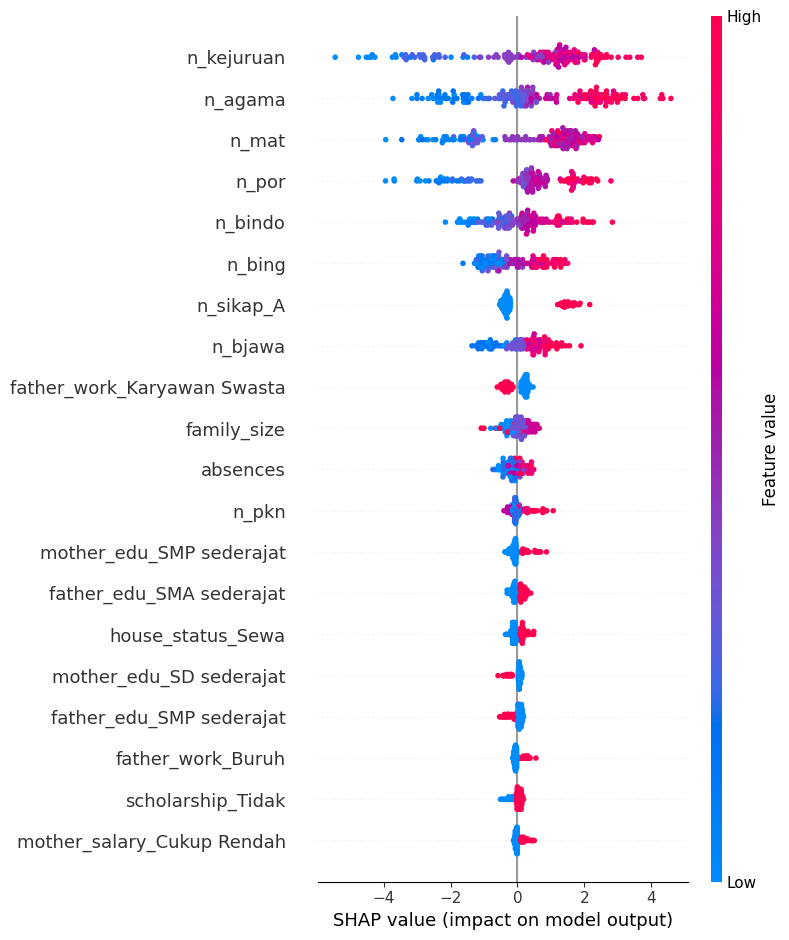

In [44]:
# Visualize the SHAP values

# Summary plot of SHAP values for all samples
# This plot shows the importance of each feature across the dataset
shap.summary_plot(shap_values, X_test)

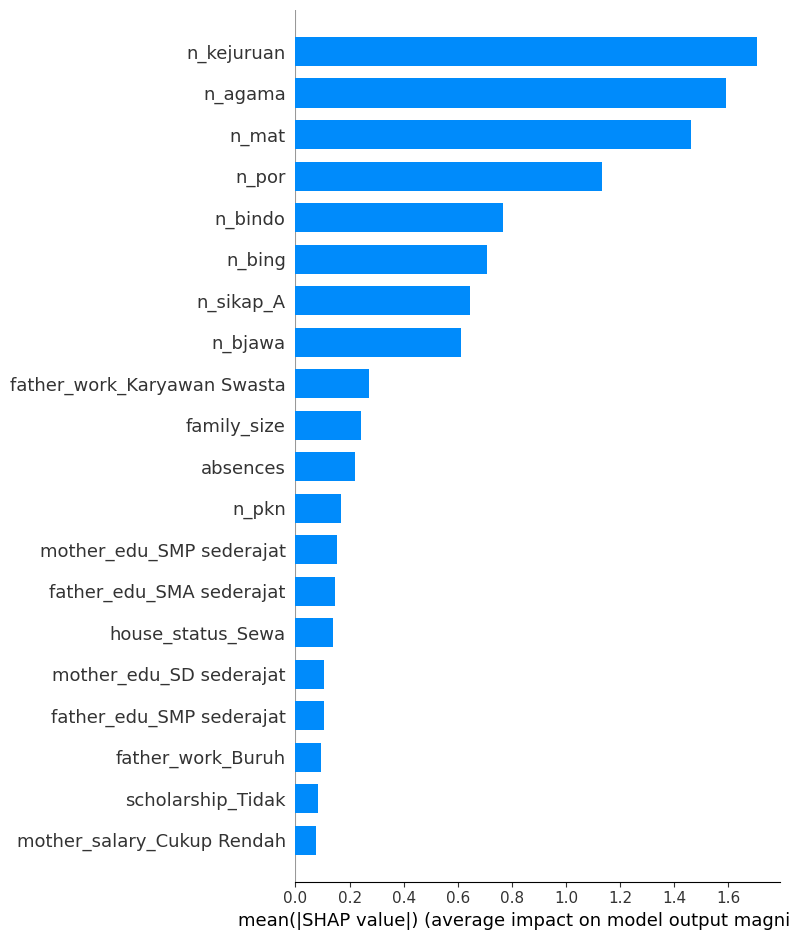

In [45]:
# Summary plot by feature importance
# This plot shows the magnitude of the SHAP values for each feature
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [46]:

# Individual SHAP value plot (force plot) for a single instance
# Choose an instance index to visualize (e.g., the first instance in the test set)
instance_index = 0
shap.initjs() # Initialize JavaScript for interactive plots
shap.force_plot(explainer.expected_value, shap_values[instance_index,:], X_test.iloc[instance_index,:])

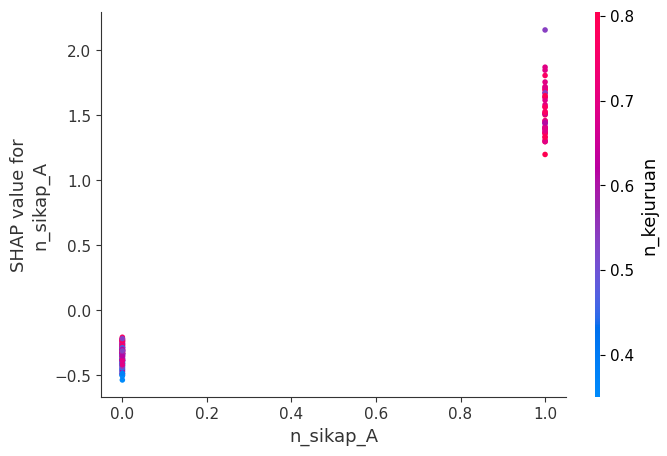

In [47]:
# Dependence plot for a single feature
# This plot shows how the value of a single feature affects the prediction
# Choose a feature name to plot (e.g., the most important feature)
most_important_feature = top_15_features['Feature'].iloc[0]
shap.dependence_plot(most_important_feature, shap_values, X_test)